# TELECOM_CUSTOMER_CHURN_DATASET

* It's an synthetic dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#warnings filtering
import warnings
warnings.filterwarnings('ignore')

#performing stats models & analysis
import statsmodels.api as sm

#algorithm
from sklearn.linear_model import LogisticRegression

#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# displaying all columns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('churn_telecom_dataset.csv') #whether the customer will churn or not
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,30,1077.640,0


In [3]:
df.dtypes #all records are numeric, but few tends to be categorical 

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [4]:
df.nunique() # complains, charge_amount, age_group, tariff_plan, churn-target_variable

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

In [5]:
df.isnull().sum() #there is no nullvalues in the dataset

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [6]:
df['Churn'].value_counts(normalize=True) #as it's an imbalanced kind of dataset

0    0.842857
1    0.157143
Name: Churn, dtype: float64

In [7]:
df.duplicated().sum() #having duplicate values, though dataset is having less records we can drop records/ might not due to synthetic data

302

In [8]:
df.drop_duplicates(inplace=True)  # also we can drop sub_set(df = df.drop_duplicates(subset=['column1', 'column2'])) if we are having multicollonearity in independent columns 

In [9]:
df.shape

(2848, 13)

In [10]:
df['Churn'].value_counts(normalize=True)

0    0.844101
1    0.155899
Name: Churn, dtype: float64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,2848.0,7.807935,7.325824,0.0,1.00000,6.00,12.00000,36.00
Complains,2848.0,0.080758,0.272512,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,2848.0,32.450140,8.725468,3.0,29.00000,35.00,38.00000,47.00
Charge Amount,2848.0,0.975421,1.550947,0.0,0.00000,0.00,2.00000,10.00
Seconds of Use,2848.0,4537.427317,4199.466722,0.0,1470.00000,3042.50,6500.00000,17090.00
Frequency of use,2848.0,70.534410,57.391252,0.0,28.00000,55.00,96.00000,255.00
Frequency of SMS,2848.0,73.841643,112.084677,0.0,7.00000,22.00,88.25000,522.00
Distinct Called Numbers,2848.0,23.887289,17.188319,0.0,11.00000,21.00,34.00000,97.00
Age Group,2848.0,2.835323,0.893674,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,2848.0,1.080407,0.271970,1.0,1.00000,1.00,1.00000,2.00


<AxesSubplot: >

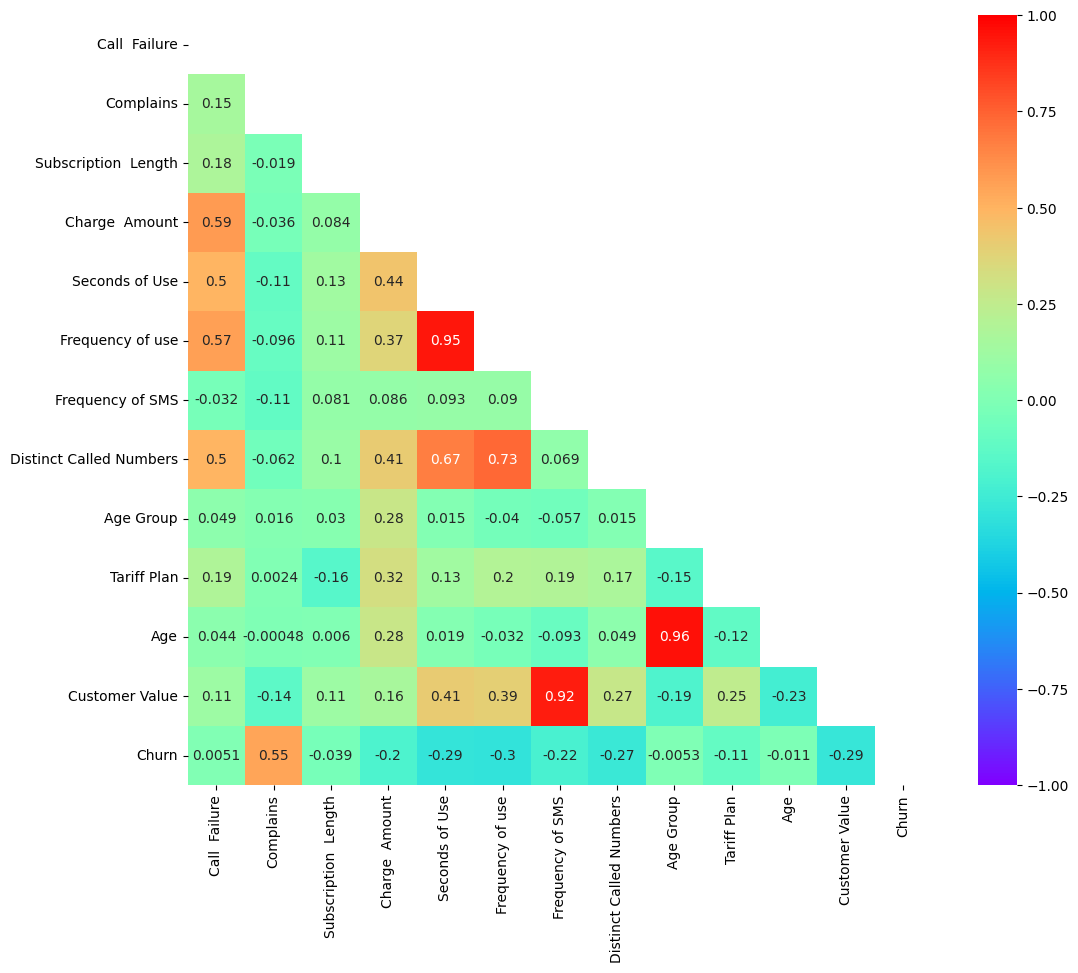

In [12]:
# checking for correlation w.r.t target variable using heatmap

plt.figure(figsize=(12,10)) 
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap='rainbow',mask=np.triu(df.corr()))

#### highly correlated between independent columns 
#### i.e., age group Vs age, customer_value Vs frequency_of_sms, frequency_of_use Vs seconds_of_use 
* instead of keeping same columns, do some statistical analysis and we can drop those columns

### 1. UNI-VARIATE ANALYSIS



In [13]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

# Splitting Categorical Columns

In [14]:
cat_cols= df[['Complains','Charge  Amount','Age Group', 'Tariff Plan', 'Age','Churn']]
cat_cols.head()

,Complains,Charge Amount,Age Group,Tariff Plan,Age,Churn
0,0,0,3,1,30,0
1,0,0,2,1,25,0
2,0,0,3,1,30,0
3,0,0,1,1,15,0
4,0,0,1,1,15,0


In [15]:
cat_cols.nunique()

Complains          2
Charge  Amount    11
Age Group          5
Tariff Plan        2
Age                5
Churn              2
dtype: int64

In [16]:
#user defined function for distplot for normal distribution check

def countplot(df):
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    for t, i in enumerate(cat_cols, start=1):
        plt.subplot(3, 2, t)
        sns.countplot(x=df[i])  
        plt.title(f'Count of {i}')
    plt.tight_layout()
    plt.show()

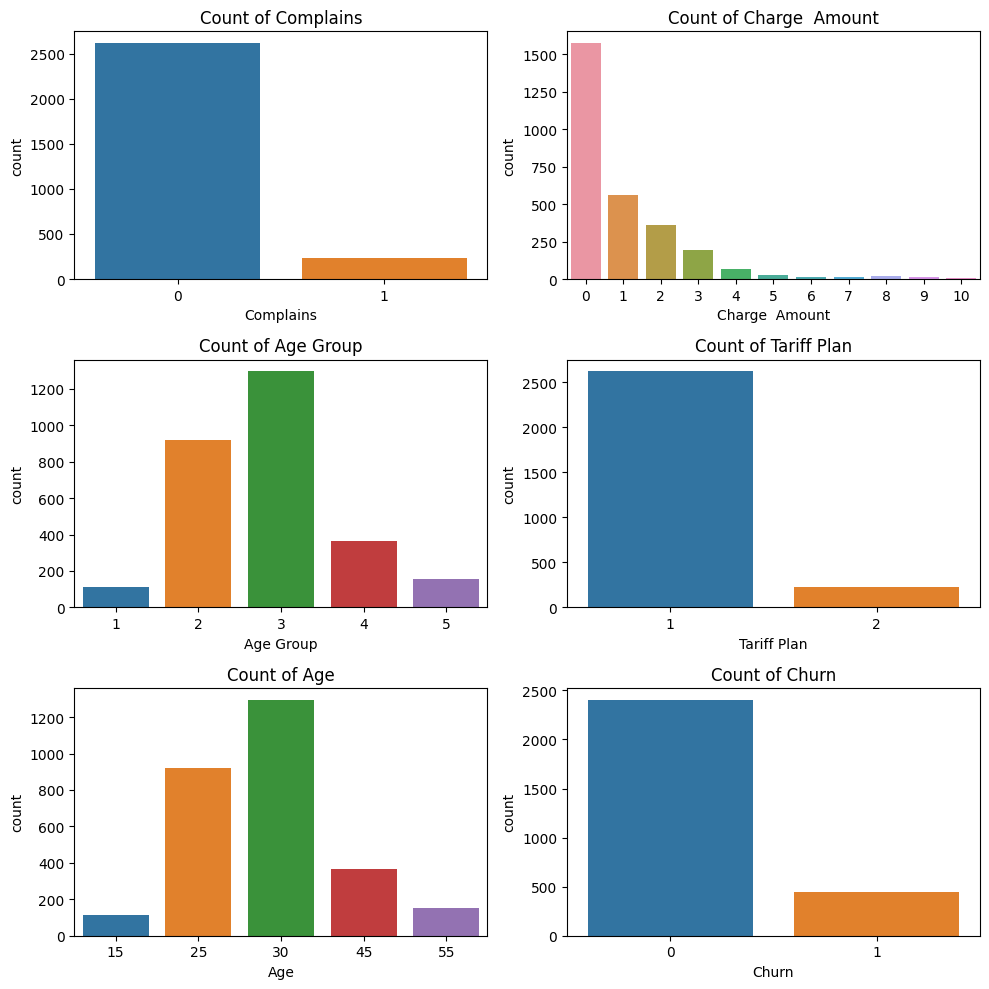

In [17]:
countplot(cat_cols)

# Splitting Numerical Columns

In [18]:
#taken numerical columns for distribution check

num_cols= df[['Call  Failure','Subscription  Length','Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers','Customer Value']]

In [19]:
num_cols.skew()

Call  Failure              1.066739
Subscription  Length      -1.251788
Seconds of Use             1.314501
Frequency of use           1.145996
Frequency of SMS           1.970042
Distinct Called Numbers    1.039981
Customer Value             1.421600
dtype: float64

In [20]:
# user define function for pair plot

def plot_pairplots(df):
    
    sns.set(style="whitegrid")
    sns.pairplot(df)

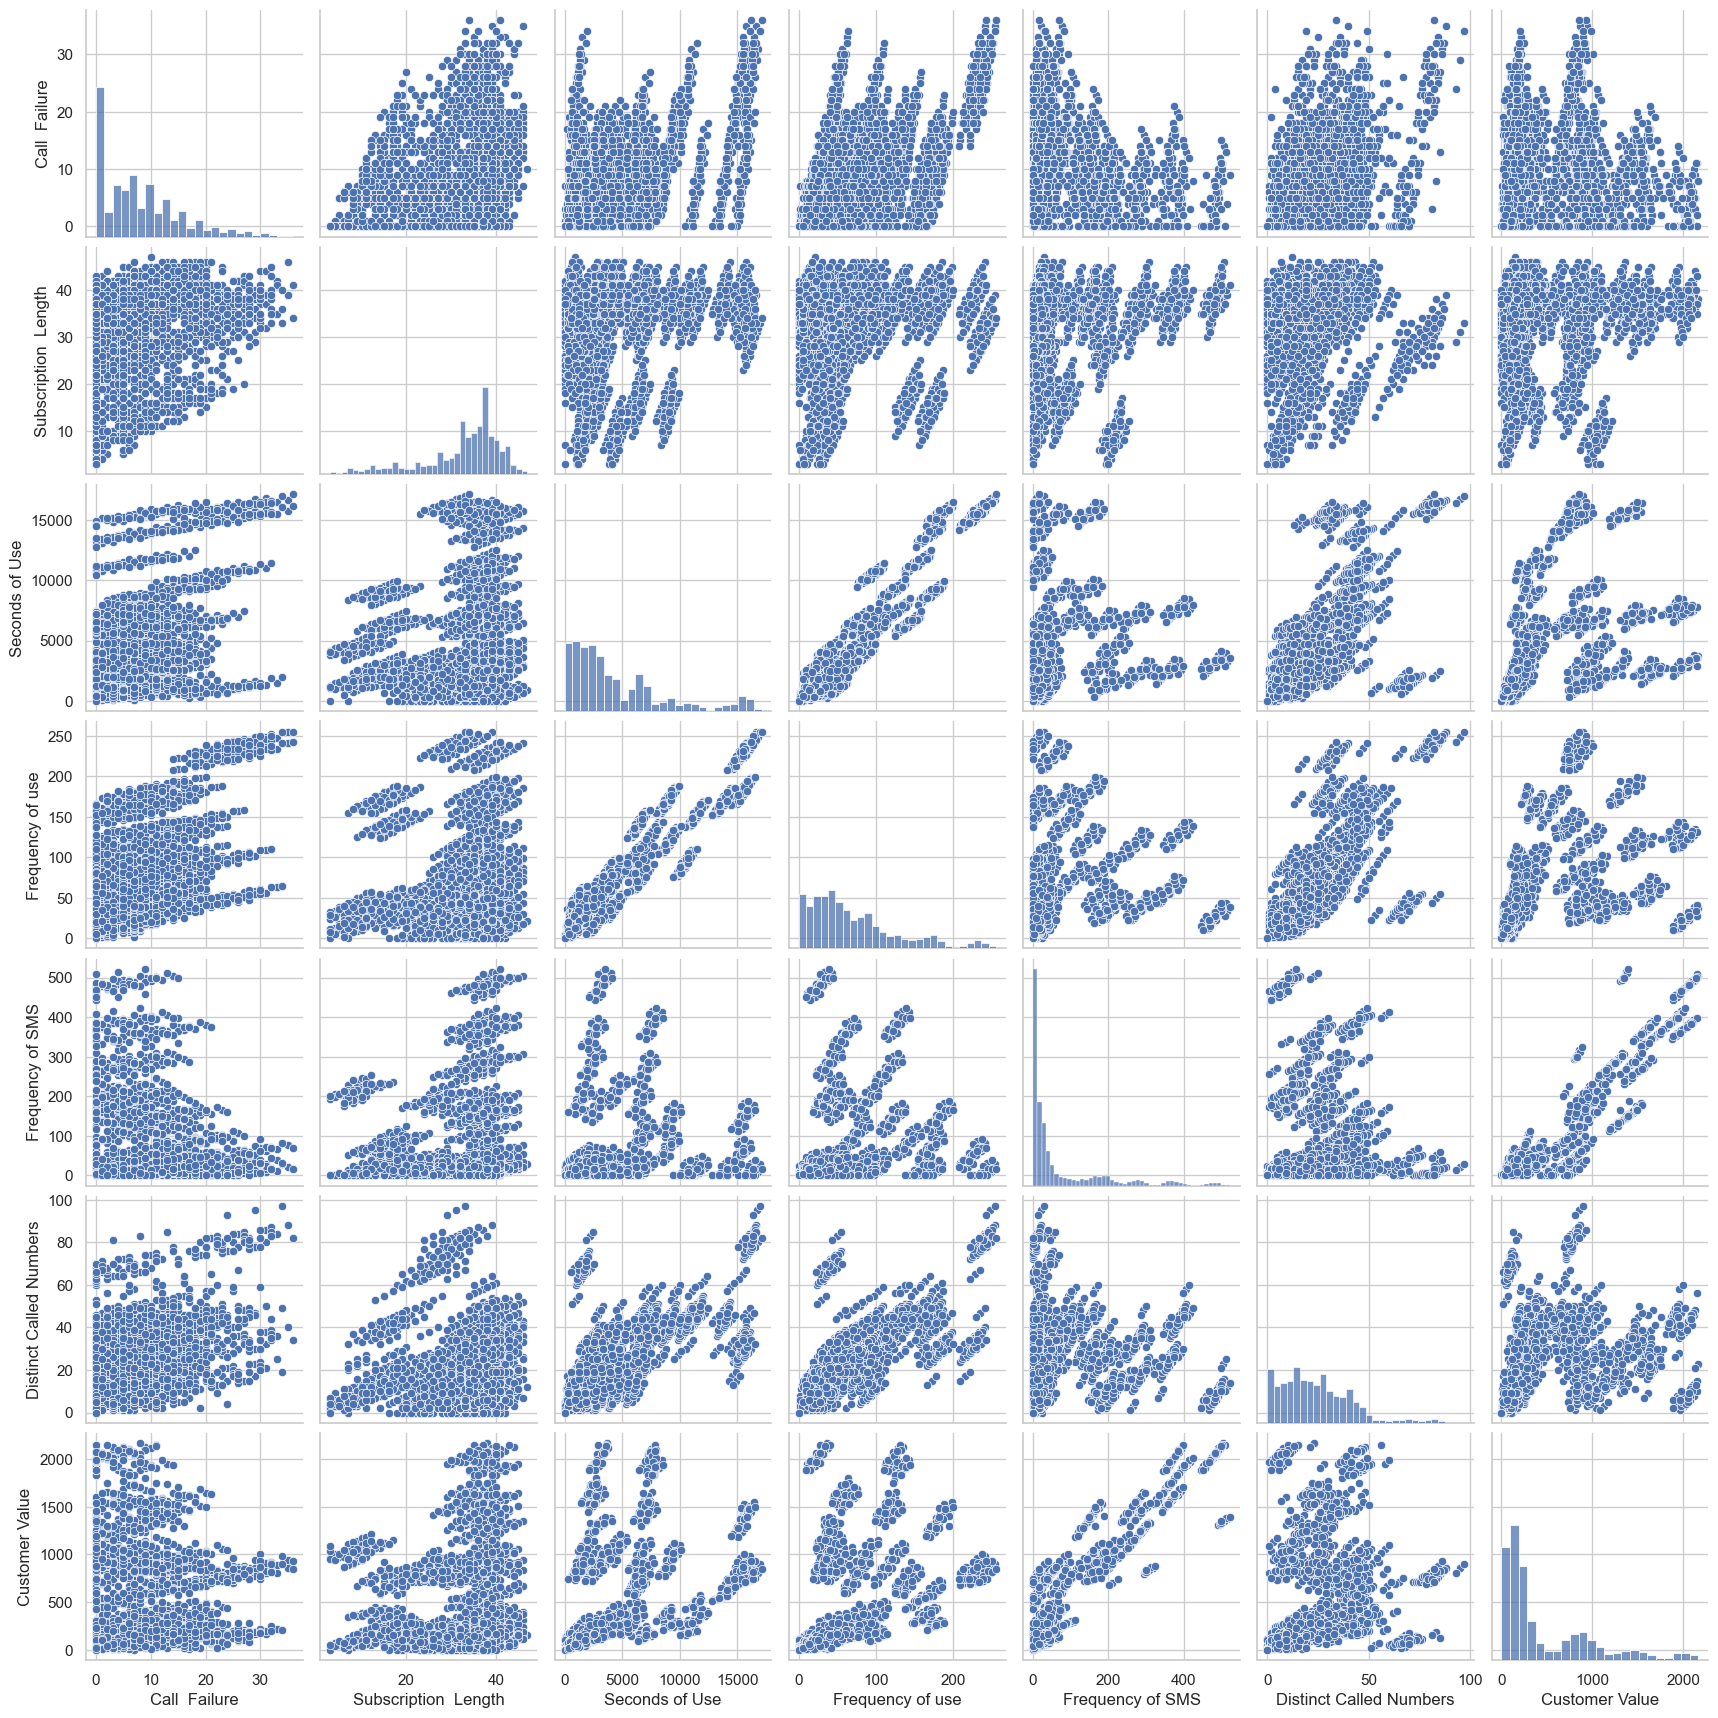

In [21]:
plot_pairplots(num_cols)

In [22]:
#user defined function for distplot for normal distribution check

def distplot(df):
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    for t, i in enumerate(num_cols, start=1):
        plt.subplot(4, 2, t)
        sns.distplot(x=df[i], kde=True)  # You can remove kde=False if you don't want KDE plot as well
        plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()

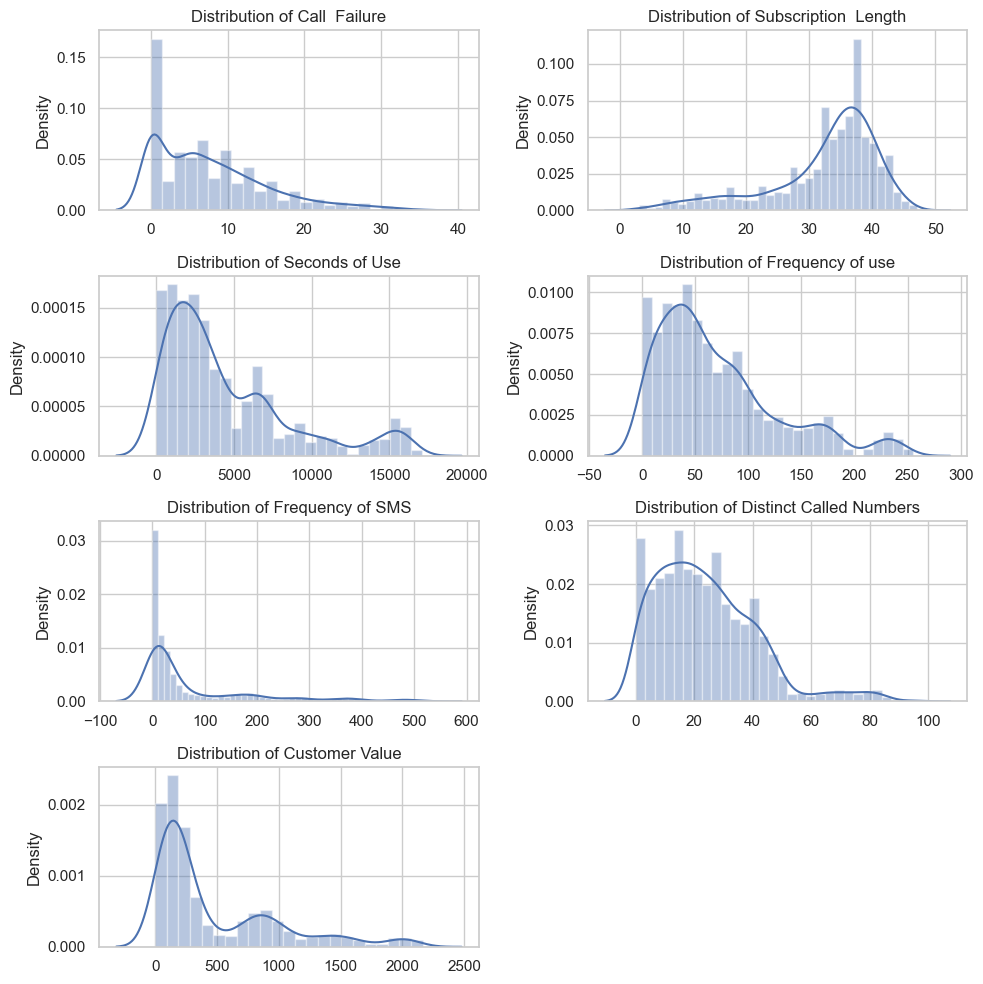

In [23]:
distplot(num_cols)

In [24]:
#user defined function for box-plot: for outlier check

def boxplot(df):
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    for t, i in enumerate(num_cols, start=1):
        plt.subplot(4, 2, t)
        sns.boxplot(x=df[i])  
        plt.title(f'Outlier check of {i}')
    plt.tight_layout()
    plt.show()

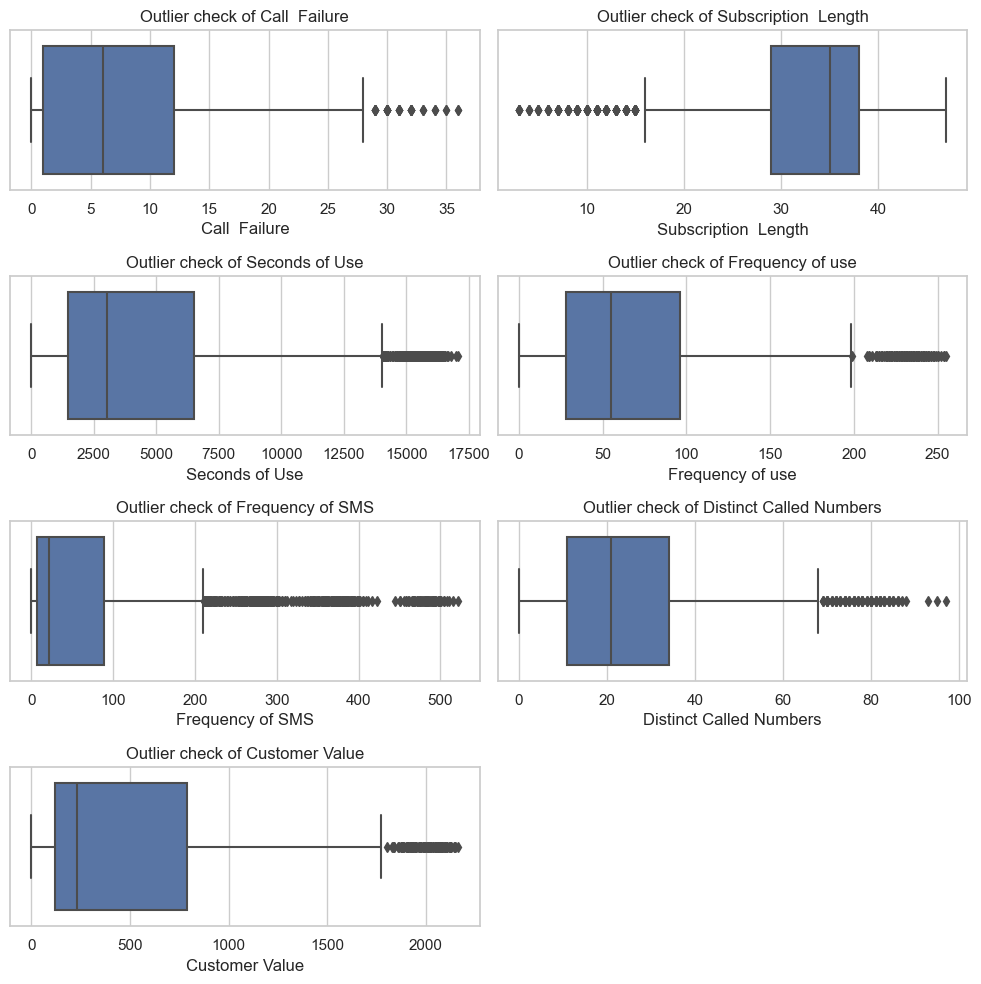

In [25]:
boxplot(num_cols)

#### as we can see that every columns are right skew, except 1 column i.e., subscription_length is left skew
#### also we can visualize that outliers were present in boxplot
* Hence we can say that outliers were present and distribution is not normal by using user defined visualization techniques

### 2. BI-Variate Analysis

#### Relationship b/w Independent Categorical  Variables Vs Target Variable

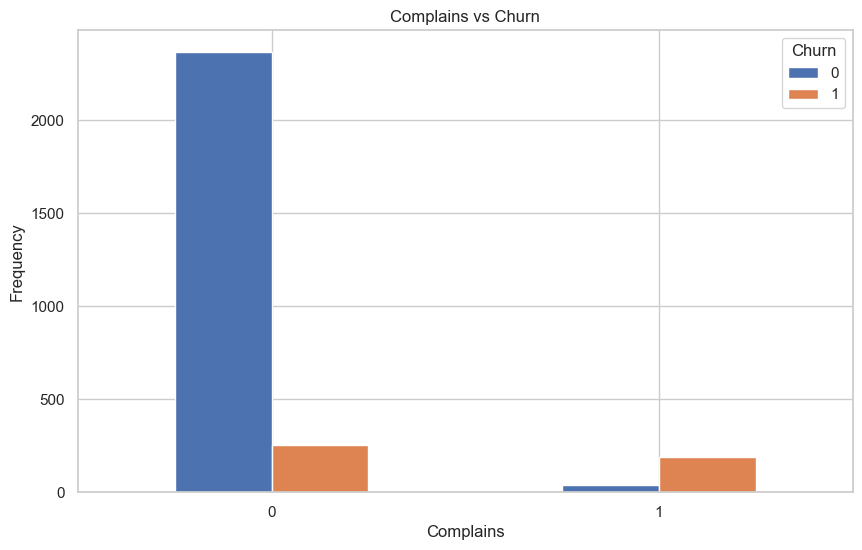

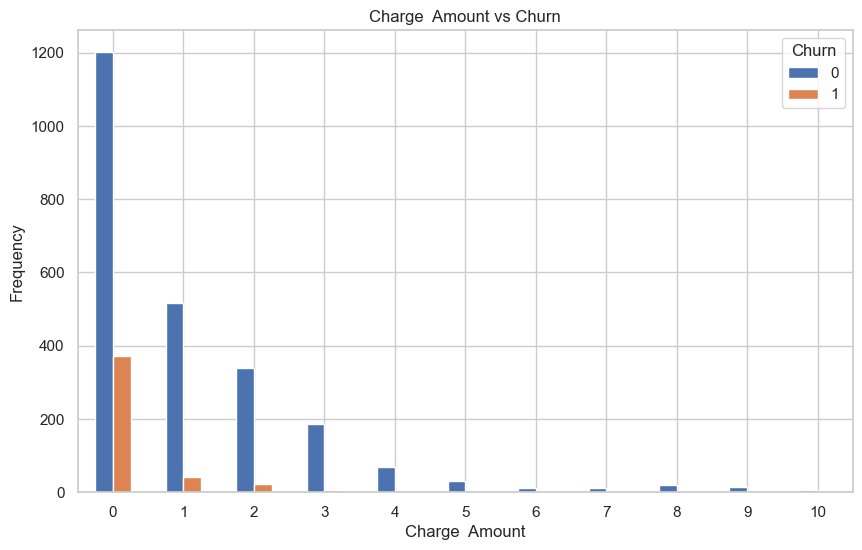

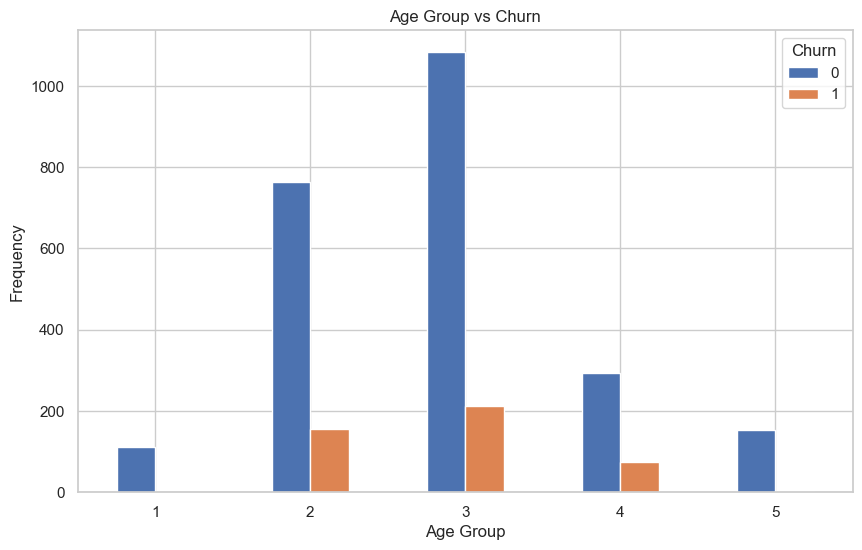

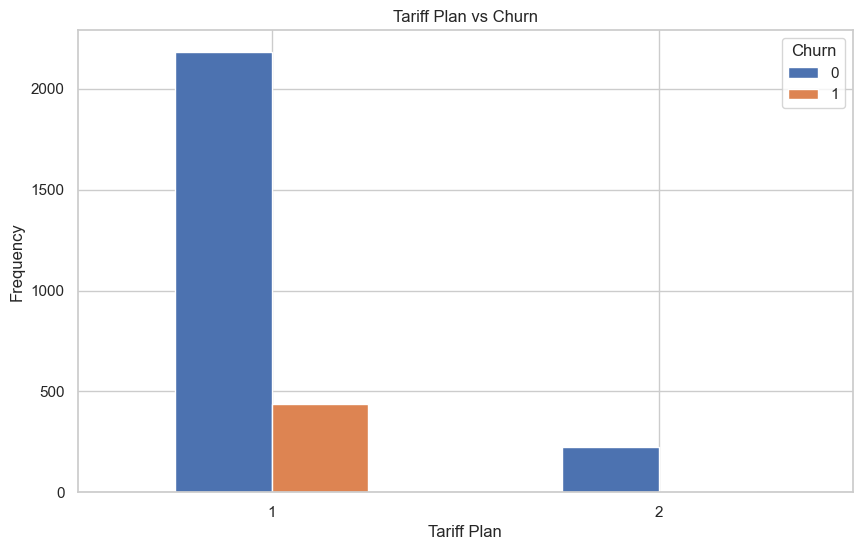

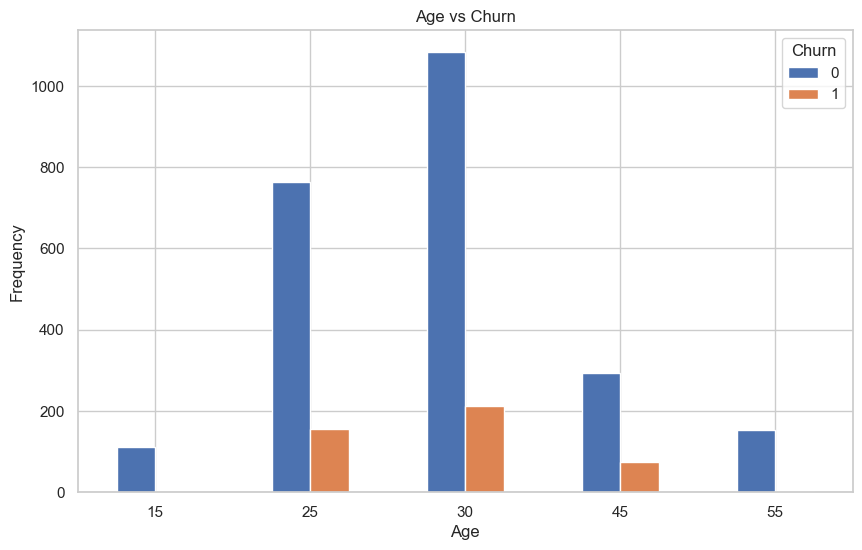

In [26]:
# user defined function for Independent categorical variables Vs Target variable

cat_cols= df[['Complains','Charge  Amount','Age Group', 'Tariff Plan', 'Age','Churn']]
cat_col1 = cat_cols.drop('Churn', axis=1)
Target_col = cat_cols['Churn']

def cat_Vs_cat_barplot(cat_col1, Target_col):
    for i in cat_col1.columns:
        cat_crosstab = pd.crosstab(cat_col1[i], Target_col)
        cat_crosstab.plot(kind='bar', figsize=(10, 6), rot=0)
        plt.title(f'{i} vs {Target_col.name}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()


cat_Vs_cat_barplot(cat_col1, Target_col)

In [27]:
num_col1 = num_cols.copy()
num_col1

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
0,8,38,4370,71,5,17,197.640
1,0,39,318,5,7,4,46.035
2,10,37,2453,60,359,24,1536.520
3,10,38,4198,66,1,35,240.020
4,3,38,2393,58,2,33,145.805
...,...,...,...,...,...,...,...
3096,17,17,9237,177,80,42,261.210
3097,13,18,3157,51,38,21,280.320
3099,8,11,1792,25,7,9,100.680
3123,26,38,10740,99,8,44,174.585


#### Relationship b/w Independent Numerical Variables Vs Target Variable

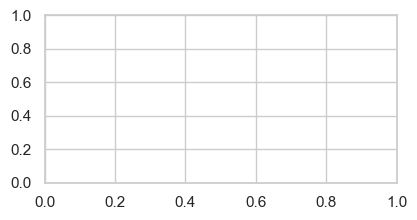

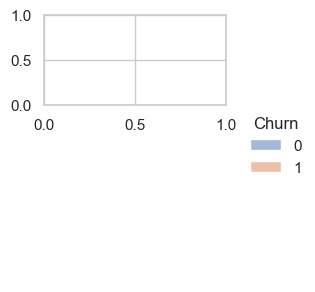

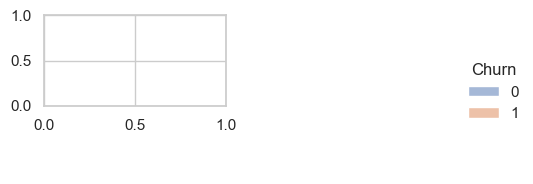

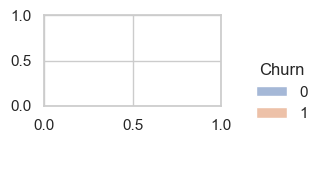

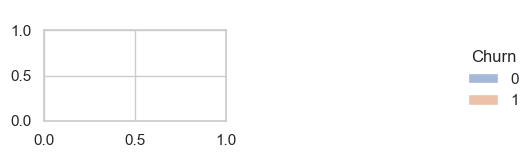

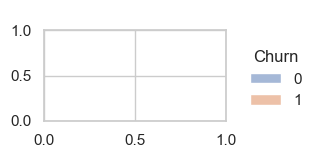

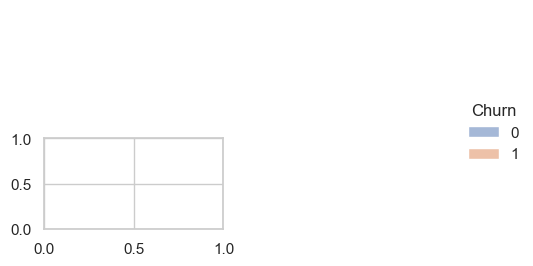

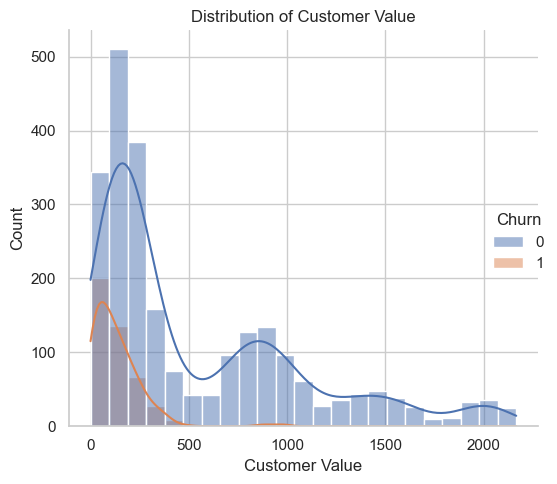

In [28]:
# user defined function for Independent categorical variables Vs Target variable

num_col1 = df[['Call  Failure','Subscription  Length','Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers','Customer Value']]
Target_col = cat_cols['Churn']


def Num_Vs_cat_barplot(num_col1, Target_col):
    plt.figure(figsize=(10, 10))  # Adjust figsize as needed
    for t, i in enumerate(num_col1.columns, start=1):
        plt.subplot(4, 2, t)
        sns.displot(x=df[i], hue=Target_col, kde=True)
        plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()
    
Num_Vs_cat_barplot(num_col1, Target_col)

# Defects in data (missing values, outliers)

In [29]:
#missing values

df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [30]:
#duplicate records

df.duplicated().sum()
#df[df[duplicated()]] # no duplicates

0

In [31]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,55,261.210,0
3097,13,0,18,4,3157,51,38,21,3,1,30,280.320,0
3099,8,1,11,2,1792,25,7,9,3,1,30,100.680,1
3123,26,0,38,9,10740,99,8,44,5,2,55,174.585,0


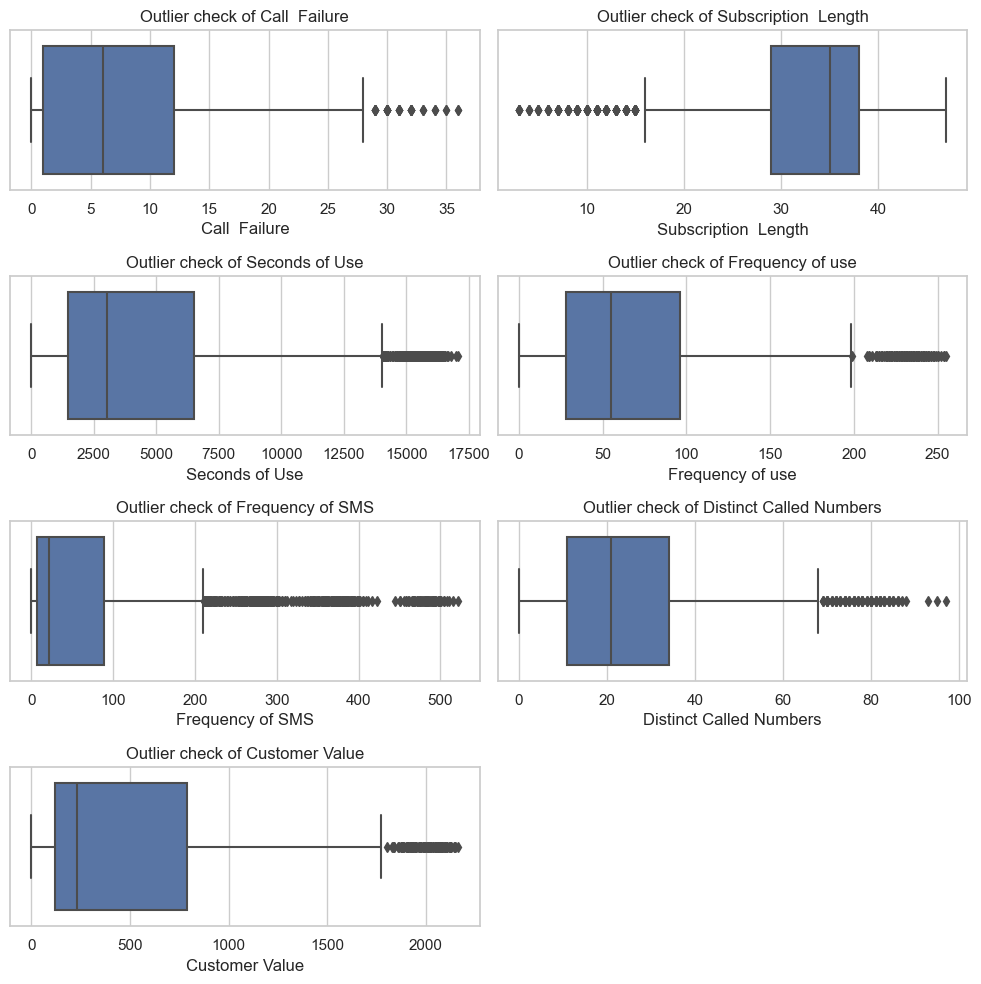

In [32]:
# outliers in num cols

boxplot(num_cols)

In [33]:
#as we dont want to loose any row(specially with churn 1).lets capping these outlier

for i in num_cols:
    c_1,c_99= df[i].quantile([0.1,0.9])
    df[i]=np.where(df[i]>c_99,c_99,df[i])
    df[i]=np.where(df[i]<c_1,c_1,df[i])

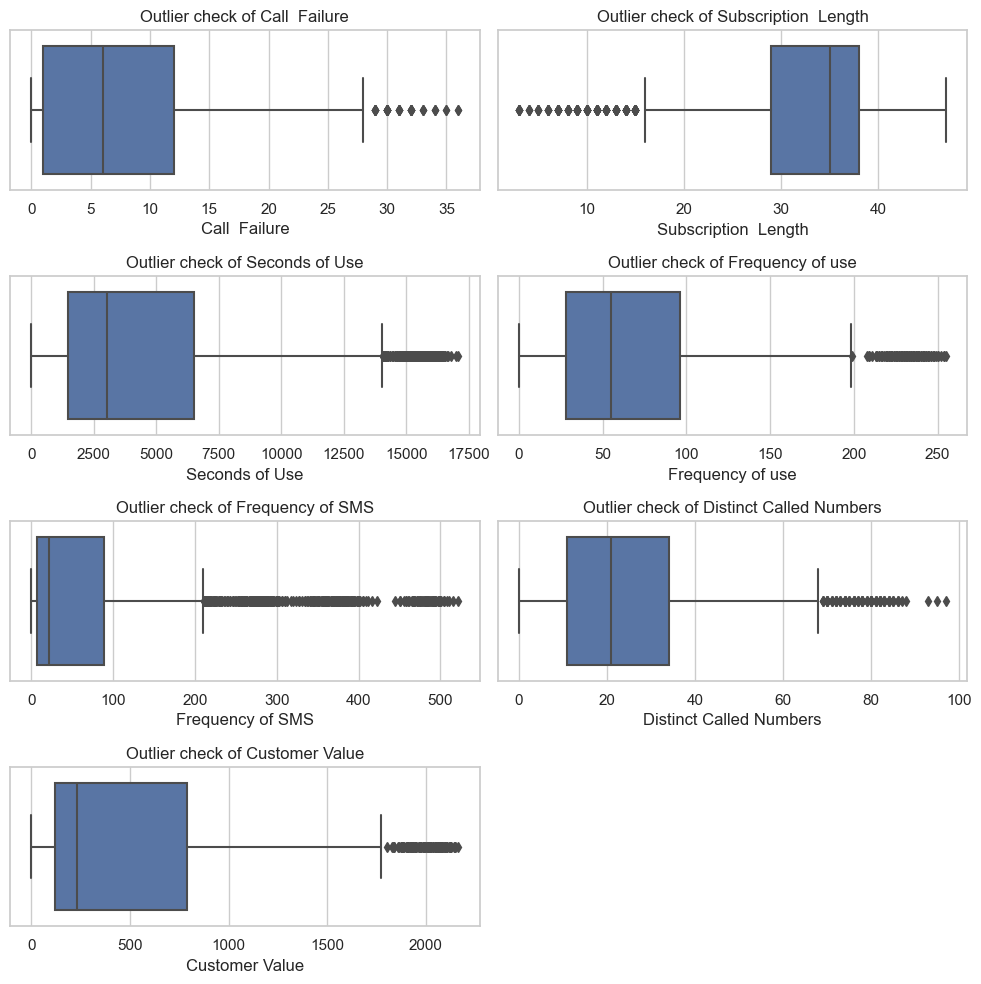

In [34]:
boxplot(num_cols)

# Concat Categorial & Numerical Columns

* After doing UNI & BI- Variate Analysis

In [35]:
df1= pd.concat([num_cols, cat_cols], axis=1)
df1.head()

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value,Complains,Charge Amount,Age Group,Tariff Plan,Age,Churn
0,8,38,4370,71,5,17,197.640,0,0,3,1,30,0
1,0,39,318,5,7,4,46.035,0,0,2,1,25,0
2,10,37,2453,60,359,24,1536.520,0,0,3,1,30,0
3,10,38,4198,66,1,35,240.020,0,0,1,1,15,0
4,3,38,2393,58,2,33,145.805,0,0,1,1,15,0


In [36]:
# befor making a model, lets drop 'Age'

del df1['Age']

In [37]:
df1.head()

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value,Complains,Charge Amount,Age Group,Tariff Plan,Churn
0,8,38,4370,71,5,17,197.640,0,0,3,1,0
1,0,39,318,5,7,4,46.035,0,0,2,1,0
2,10,37,2453,60,359,24,1536.520,0,0,3,1,0
3,10,38,4198,66,1,35,240.020,0,0,1,1,0
4,3,38,2393,58,2,33,145.805,0,0,1,1,0


# Logistic Regression

In [38]:
x=df1.drop('Churn', axis=1)
y=df1['Churn']

model1=sm.Logit(y, sm.add_constant(x)).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.223898
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2848
Model:                          Logit   Df Residuals:                     2836
Method:                           MLE   Df Model:                           11
Date:                Fri, 09 Feb 2024   Pseudo R-squ.:                  0.4827
Time:                        17:46:37   Log-Likelihood:                -637.66
converged:                       True   LL-Null:                       -1232.6
Covariance Type:            nonrobust   LLR p-value:                2.381e-248
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0392      0.794     -1.308      0.191      -2.596       0.518
Call  Failure               0.1651      0.018      9.391      0.000       0.131       0.200
Subscription  Length       -0.0085      0.009     -0.951      0.342      -0.026       0.009
Seconds of Use              0.0002      0.000      1.431      0.153   -7.36e-05       0.000
Frequency of use           -0.0560      0.008     -6.712      0.000      -0.072      -0.040
Frequency of SMS           -0.0269      0.012     -2.296      0.022      -0.050      -0.004
Distinct Called Numbers    -0.0155      0.009     -1.716      0.086      -0.033       0.002
Customer Value              0.0034      0.003      1.256      0.209      -0.002       0.009
Complains                   4.1768      0.290     14.399      0.000       3.608       4.745
Charge  Amount             -0.7171      0.116     -6.200      0.000      -0.944      -0.490
Age Group                   0.0838      0.115      0.732      0.464      -0.141       0.308
Tariff Plan                 0.4209      0.670      0.629      0.530      -0.892       1.734
===========================================================================================
"""

# Multi colinearity

In [39]:
# as per this column, the significant columns are 
model1.pvalues[model1.pvalues<0.05]

Call  Failure       5.939218e-21
Frequency of use    1.925892e-11
Frequency of SMS    2.167896e-02
Complains           5.256204e-47
Charge  Amount      5.655589e-10
dtype: float64

In [40]:
#lets check the VIF

vif=[] #variables must be continuous, numeric

for i in range(len(x.columns)):
    vif.append(variance_inflation_factor(x.values,i))
pd.DataFrame({'Feature':x.columns,'VIF':vif}).sort_values(by='VIF',ascending=False)

,Feature,VIF
6,Customer Value,87.802135
4,Frequency of SMS,53.835867
2,Seconds of Use,46.338802
3,Frequency of use,43.195290
9,Age Group,15.484119
10,Tariff Plan,14.044048
1,Subscription Length,11.800438
5,Distinct Called Numbers,6.770416
0,Call Failure,5.570060
8,Charge Amount,3.459925


In [41]:
num_cols

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
0,8,38,4370,71,5,17,197.640
1,0,39,318,5,7,4,46.035
2,10,37,2453,60,359,24,1536.520
3,10,38,4198,66,1,35,240.020
4,3,38,2393,58,2,33,145.805
...,...,...,...,...,...,...,...
3096,17,17,9237,177,80,42,261.210
3097,13,18,3157,51,38,21,280.320
3099,8,11,1792,25,7,9,100.680
3123,26,38,10740,99,8,44,174.585


<AxesSubplot: >

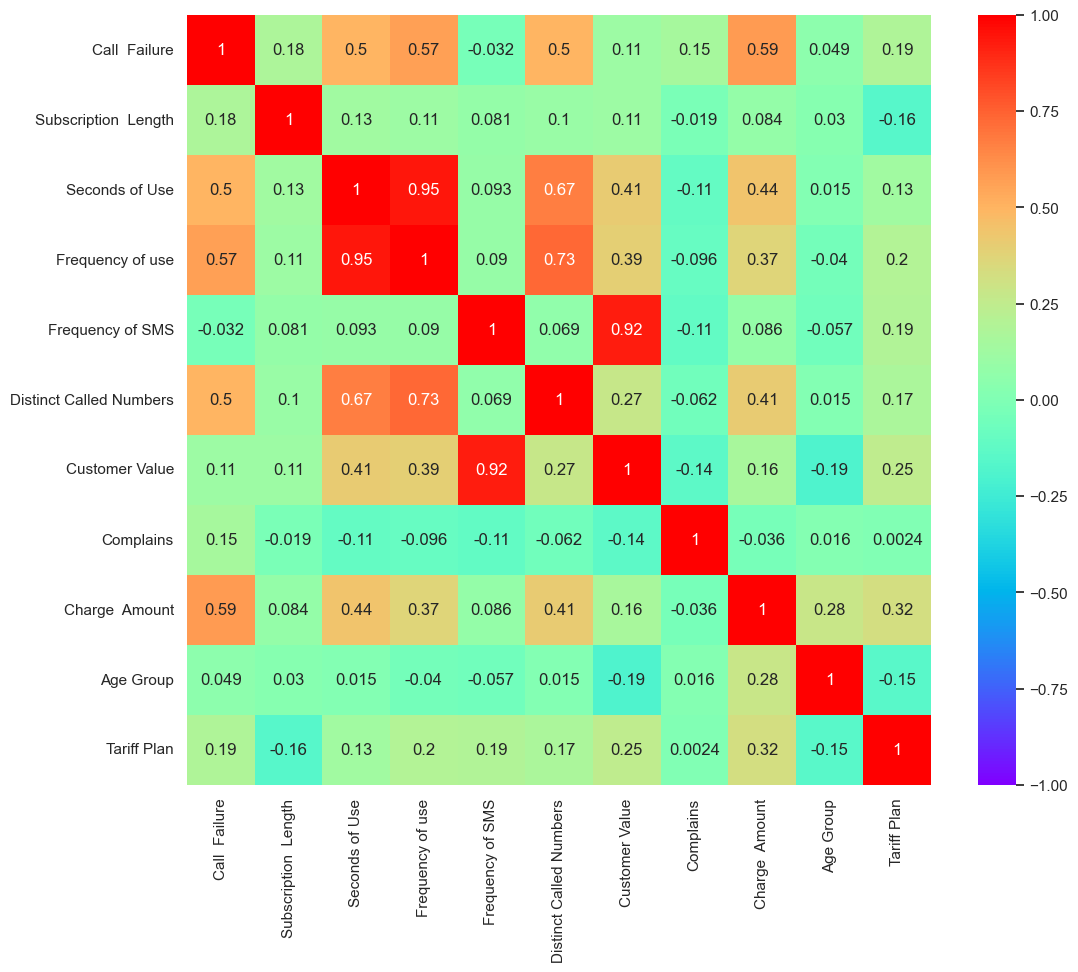

In [42]:
# snsplot without target variable
plt.figure(figsize=(12,10)) 
sns.heatmap(x.corr(), vmin=-1, vmax=+1, annot=True, cmap='rainbow') #remove multi coliniary

In [43]:
for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name, '-->', vif)
    

Call  Failure --> 5.570060063021899
Subscription  Length --> 11.800438209498703
Seconds of Use --> 46.33880206599154
Frequency of use --> 43.19528983876533
Frequency of SMS --> 53.83586735796336
Distinct Called Numbers --> 6.770415891792788
Customer Value --> 87.80213536099275


In [44]:
x.drop('Customer Value', axis=1, inplace=True)

num_cols= ['Call  Failure','Subscription  Length','Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers']

for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name, '-->', vif)
    

Call  Failure --> 5.568852415819653
Subscription  Length --> 11.079664466319224
Seconds of Use --> 29.32024826271795
Frequency of use --> 42.61890176301511
Frequency of SMS --> 1.5579005481576542
Distinct Called Numbers --> 6.751421374764275


In [45]:
sm.Logit(y, sm.add_constant(x)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.224183
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2848
Model:                          Logit   Df Residuals:                     2837
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Feb 2024   Pseudo R-squ.:                  0.4820
Time:                        17:46:38   Log-Likelihood:                -638.47
converged:                       True   LL-Null:                       -1232.6
Covariance Type:            nonrobust   LLR p-value:                4.773e-249
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8228      0.771     -1.067      0.286      -2.334       0.688
Call  Failure               0.1607      0.017      9.448      0.000       0.127       0.194
Subscription  Length       -0.0086      0.009     -0.972      0.331      -0.026       0.009
Seconds of Use              0.0003      0.000      2.994      0.003       0.000       0.001
Frequency of use           -0.0535      0.008     -6.687      0.000      -0.069      -0.038
Frequency of SMS           -0.0126      0.003     -4.800      0.000      -0.018      -0.007
Distinct Called Numbers    -0.0173      0.009     -1.956      0.050      -0.035    3.31e-05
Complains                   4.1644      0.289     14.399      0.000       3.598       4.731
Charge  Amount             -0.7379      0.113     -6.526      0.000      -0.960      -0.516
Age Group                  -0.0092      0.088     -0.104      0.917      -0.182       0.164
Tariff Plan                 0.4764      0.666      0.716      0.474      -0.828       1.781
===========================================================================================
"""

<AxesSubplot: >

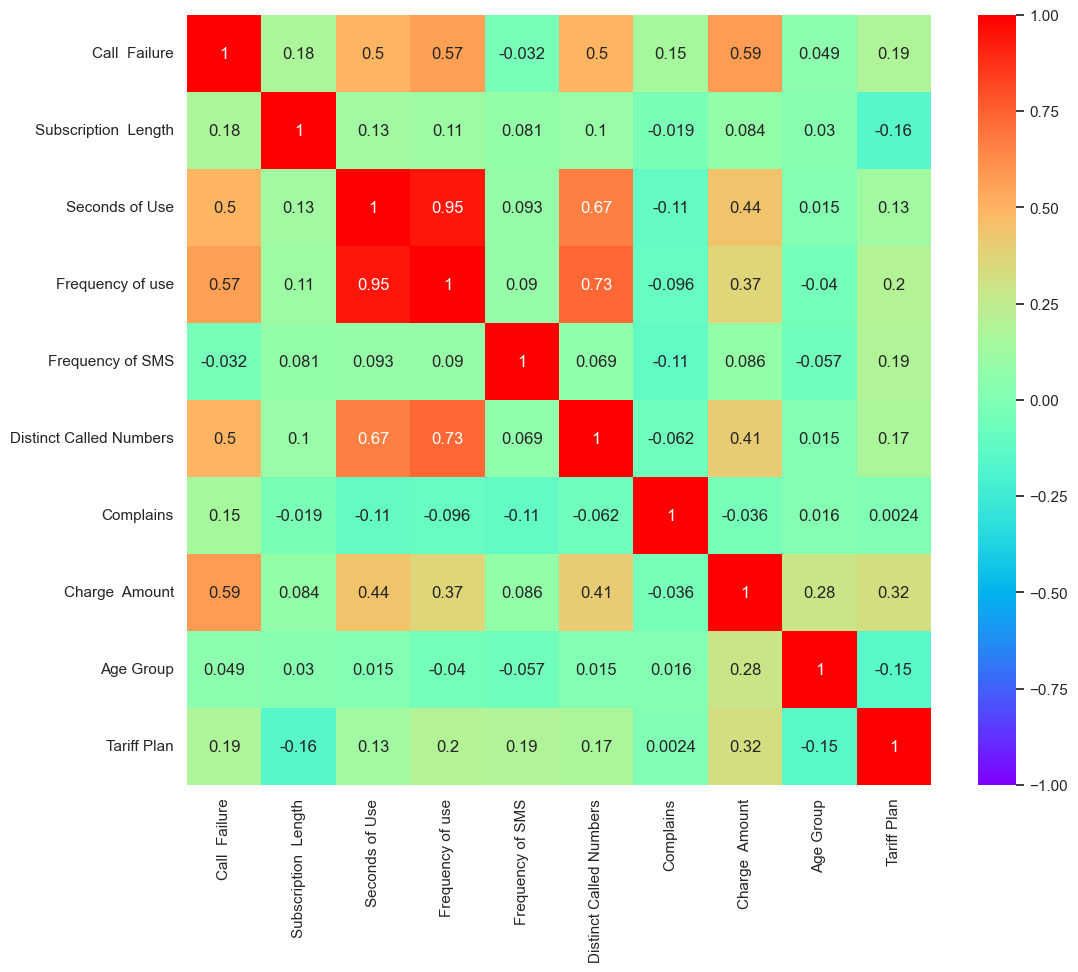

In [46]:
plt.figure(figsize=(12,10)) 
sns.heatmap(x.corr(), vmin=-1, vmax=+1, annot=True, cmap='rainbow') 
#frequency of use, & seconds of use having higher multicolinearity
# so drop 1 column, where i will go with seconds of use

In [47]:
x.drop('Seconds of Use', axis=1, inplace=True)

num_cols= ['Call  Failure','Subscription  Length', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers']

for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name, '-->', vif)

Call  Failure --> 4.7443675549029924
Subscription  Length --> 10.66727503695785
Frequency of use --> 6.422322319571065
Frequency of SMS --> 1.5578030813330574
Distinct Called Numbers --> 6.574116340559197


* as my vif is less than 10, so i will built a model

In [48]:
sm.Logit(y, sm.add_constant(x)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.225683
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2848
Model:                          Logit   Df Residuals:                     2838
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Feb 2024   Pseudo R-squ.:                  0.4786
Time:                        17:46:39   Log-Likelihood:                -642.75
converged:                       True   LL-Null:                       -1232.6
Covariance Type:            nonrobust   LLR p-value:                2.818e-248
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6160      0.800     -0.770      0.441      -2.184       0.952
Call  Failure               0.1394      0.015      9.136      0.000       0.110       0.169
Subscription  Length       -0.0083      0.009     -0.934      0.351      -0.026       0.009
Frequency of use           -0.0337      0.004     -7.855      0.000      -0.042      -0.025
Frequency of SMS           -0.0127      0.003     -4.438      0.000      -0.018      -0.007
Distinct Called Numbers    -0.0181      0.009     -2.102      0.036      -0.035      -0.001
Complains                   4.1694      0.289     14.421      0.000       3.603       4.736
Charge  Amount             -0.5996      0.106     -5.640      0.000      -0.808      -0.391
Age Group                   0.0040      0.088      0.045      0.964      -0.168       0.176
Tariff Plan                 0.2554      0.685      0.373      0.709      -1.086       1.597
===========================================================================================
"""

<AxesSubplot: >

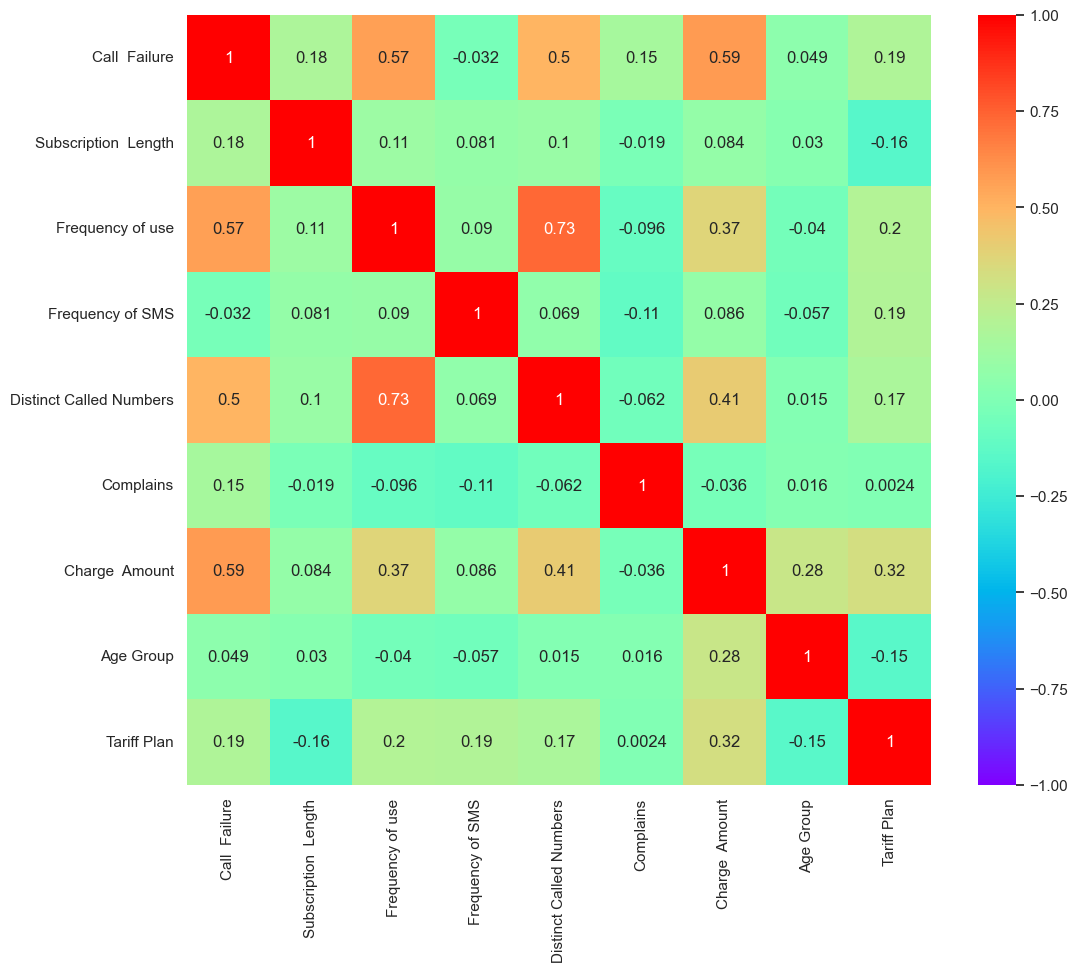

In [49]:
plt.figure(figsize=(12,10)) 
sns.heatmap(x.corr(), vmin=-1, vmax=+1, annot=True, cmap='rainbow') 

# Predictions

To validate we need to split the dataset in train, test

In [50]:
x=df.drop('Churn', axis=1)
y=df['Churn']

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75, stratify=y, random_state=1)

In [52]:
model_full=LogisticRegression()
model_full.fit(x_train, y_train)

LogisticRegression()

In [53]:
pred_p= model_full.predict_proba(x_test)[:,1]
pred= np.where(pred_p>0.5,1,0)

In [54]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,classification_report,roc_auc_score,roc_curve

def validation(actual,pred,pred_prob):
    print(confusion_matrix(actual,pred))
    print(classification_report(actual,pred))
    print(cohen_kappa_score(actual,pred))
    fpr,tpr,thre=roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red') #for diagonal
    plt.show()

[[583  18]
 [ 86  25]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       601
           1       0.58      0.23      0.32       111

    accuracy                           0.85       712
   macro avg       0.73      0.60      0.62       712
weighted avg       0.83      0.85      0.83       712

0.2602745199896106


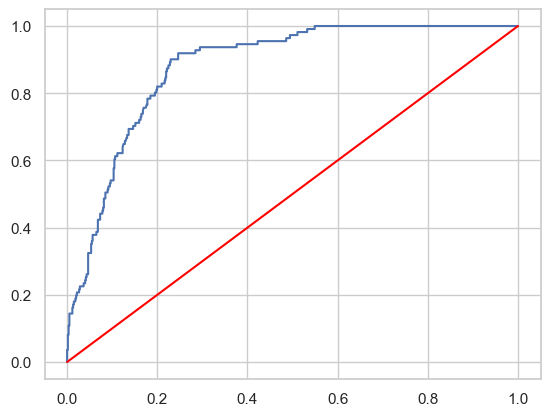

In [55]:
validation(y_test,pred,pred_p)

In [56]:
fpr,tpr,thr=roc_curve(y_test, pred_p)
pd.DataFrame({'FPR':fpr, 'TPR':tpr,'Threshold':thr, 'Yoden Index':tpr-fpr})\
.sort_values(by='Yoden Index', ascending=False)

,FPR,TPR,Threshold,Yoden Index
124,0.246256,0.918919,0.222001,0.672663
122,0.229617,0.900901,0.241532,0.671284
120,0.227953,0.891892,0.244330,0.663938
121,0.229617,0.891892,0.242401,0.662275
118,0.224626,0.882883,0.250481,0.658257
...,...,...,...,...
2,0.000000,0.036036,0.719814,0.036036
3,0.001664,0.036036,0.693279,0.034372
1,0.000000,0.009009,0.778505,0.009009
0,0.000000,0.000000,1.778505,0.000000


In [57]:
pred_yoden= np.where(pred_p>0.147,1,0)

[[409 192]
 [  7 104]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       601
           1       0.35      0.94      0.51       111

    accuracy                           0.72       712
   macro avg       0.67      0.81      0.66       712
weighted avg       0.88      0.72      0.76       712

0.3676675354350387


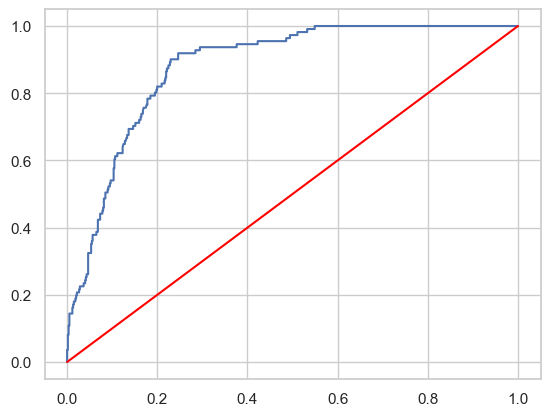

In [58]:
#validation after better threshold clasification

validation(y_test, pred_yoden, pred_p)

In [59]:
fpr,tpr,thr=roc_curve(y_test, pred_p)
pd.DataFrame({'FPR':fpr, 'TPR':tpr,'Threshold':thr, 'Yoden Index':tpr-fpr})\
.sort_values(by='Yoden Index', ascending=False)

,FPR,TPR,Threshold,Yoden Index
124,0.246256,0.918919,0.222001,0.672663
122,0.229617,0.900901,0.241532,0.671284
120,0.227953,0.891892,0.244330,0.663938
121,0.229617,0.891892,0.242401,0.662275
118,0.224626,0.882883,0.250481,0.658257
...,...,...,...,...
2,0.000000,0.036036,0.719814,0.036036
3,0.001664,0.036036,0.693279,0.034372
1,0.000000,0.009009,0.778505,0.009009
0,0.000000,0.000000,1.778505,0.000000


In [60]:
pred_yoden= np.where(pred_p>0.3,1,0)

[[502  99]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       601
           1       0.45      0.73      0.56       111

    accuracy                           0.82       712
   macro avg       0.70      0.78      0.72       712
weighted avg       0.87      0.82      0.83       712

0.45077497129735933


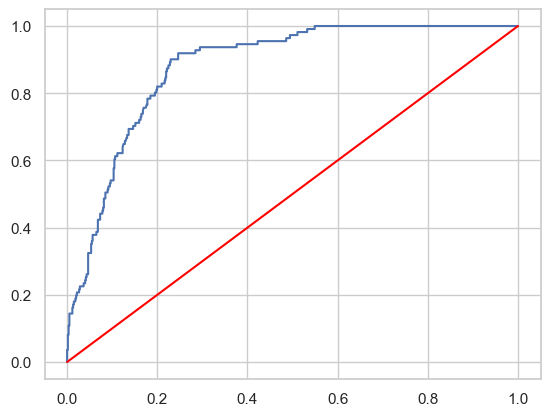

In [61]:
#validation after better threshold clasification

validation(y_test, pred_yoden, pred_p)

# Balancing the Data

#### pip install -U imbalanced-learn 

* install above for imbalanced data, if it's not installed in your jupiter notebook

pip install -U imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
os= SMOTE(sampling_strategy=0.5, random_state=3)

In [65]:
x_train_b,y_train_b=os.fit_resample(x_train, y_train)

In [66]:
y_train.value_counts()

0    1803
1     333
Name: Churn, dtype: int64

In [67]:
y_train_b.value_counts()

0    1803
1     901
Name: Churn, dtype: int64

In [68]:
model_balanced= LogisticRegression()

In [69]:
model_balanced.fit(x_train_b, y_train_b)

LogisticRegression()

In [70]:
pred_balanced_p= model_balanced.predict_proba(x_test)[:,1]
pred_balanced_p

array([4.15878836e-02, 5.58458665e-01, 1.34883017e-01, 5.21857391e-01,
       4.47806672e-01, 1.07502968e-01, 4.44049830e-01, 4.70531661e-01,
       1.95082747e-02, 4.70732497e-03, 1.41988097e-01, 2.40226659e-01,
       7.58090820e-02, 7.32684855e-02, 1.57225656e-01, 1.60751202e-01,
       3.38128221e-01, 7.05489398e-01, 5.04031929e-01, 3.17849173e-01,
       1.23126777e-01, 3.00823987e-01, 3.19988643e-01, 7.53230177e-01,
       4.08943789e-01, 4.32598178e-01, 4.69602828e-02, 1.59864288e-01,
       6.79373345e-01, 6.77034557e-01, 7.77518521e-03, 8.23380839e-01,
       1.79615228e-01, 5.77460934e-01, 6.77665871e-01, 5.09799957e-01,
       6.67912344e-01, 2.63924206e-02, 6.62123453e-01, 5.70320206e-01,
       6.48113961e-01, 3.88679533e-02, 4.36166645e-02, 5.18902865e-02,
       1.17760259e-01, 4.45520800e-01, 2.96537306e-01, 5.95103238e-02,
       2.90914711e-01, 6.95979249e-02, 1.03100483e-01, 3.59519344e-02,
       5.32398134e-01, 8.61650890e-02, 1.79632232e-02, 3.02646985e-01,
      

In [71]:
fpr,tpr,thr=roc_curve(y_test, pred_balanced_p)

pd.DataFrame({'FPR':fpr, 'TPR':tpr,'Threshold':thr, 'Yoden Index':tpr-fpr})\
.sort_values(by='Yoden Index', ascending=False)

,FPR,TPR,Threshold,Yoden Index
121,0.249584,0.927928,0.398550,0.678344
117,0.232945,0.900901,0.431672,0.667956
119,0.244592,0.909910,0.410694,0.665318
115,0.231281,0.891892,0.437479,0.660611
120,0.249584,0.909910,0.403574,0.660326
...,...,...,...,...
2,0.000000,0.036036,0.880380,0.036036
3,0.001664,0.036036,0.865436,0.034372
1,0.000000,0.009009,0.904095,0.009009
0,0.000000,0.000000,1.904095,0.000000


[[484 117]
 [ 23  88]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       601
           1       0.43      0.79      0.56       111

    accuracy                           0.80       712
   macro avg       0.69      0.80      0.72       712
weighted avg       0.87      0.80      0.82       712

0.444623973434662


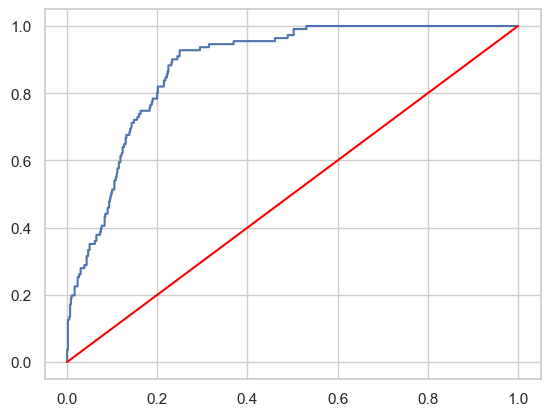

In [72]:
pred_bal_yoden= np.where(pred_p>0.276,1,0)

validation(y_test, pred_bal_yoden, pred_balanced_p)

In [73]:
from sklearn.preprocessing import StandardScaler #scaling, so we need to do for both target variable

ss= StandardScaler()

In [74]:
x_c=x.copy()

In [75]:
x_train_s, x_test_s, y_train_s, y_test_s= train_test_split(x_c, y, train_size=0.75, stratify=y, random_state=2)

# KNN Algorithm

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier()

In [77]:
knn_model.fit(x_train_s, y_train_s)

KNeighborsClassifier()

In [78]:
pred_p= knn_model.predict_proba(x_test_s)[:,1]
pred= knn_model.predict(x_test_s)

In [79]:
pred_p

array([0.4, 0.2, 0.4, 0. , 0.6, 0. , 0. , 0. , 0.8, 0. , 0.4, 0. , 0. ,
       0.2, 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.2, 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0.2, 0. , 0.2, 0.4,
       0.2, 0. , 0. , 0.2, 0. , 0.2, 0. , 0.8, 0. , 0. , 0.2, 0.6, 0.2,
       0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0.4, 0.6, 0.2, 0. , 0. , 0.4,
       0. , 0.2, 0. , 0.6, 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0.2,
       0.4, 0. , 0. , 0.2, 0. , 0. , 0. , 1. , 0.6, 0. , 0. , 0. , 0. ,
       0. , 0.4, 0. , 0.2, 0. , 0.4, 0.6, 0. , 0.6, 0. , 0.2, 0. , 0. ,
       0.4, 0.2, 0.2, 0. , 0. , 0.4, 0. , 0. , 0.2, 0.4, 0.2, 0.2, 0.2,
       0. , 0. , 0.6, 0.2, 0.2, 0. , 0. , 0. , 0. , 0.2, 0.2, 0. , 0. ,
       0.6, 0. , 0.4, 0.2, 0.4, 0.8, 0.6, 0.8, 0.2, 0. , 0.2, 0. , 0. ,
       0. , 0. , 0.4, 0.6, 0.4, 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.6, 0.6, 0.4, 0.4, 0. , 0. , 0. , 0. , 0. , 0.2, 0.2,
       0.2, 0. , 0.8, 0.4, 0.6, 0.2, 0. , 0. , 0. , 0. , 0.2, 0.

[[571  30]
 [ 63  48]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       601
           1       0.62      0.43      0.51       111

    accuracy                           0.87       712
   macro avg       0.76      0.69      0.72       712
weighted avg       0.86      0.87      0.86       712

0.43526762869716507


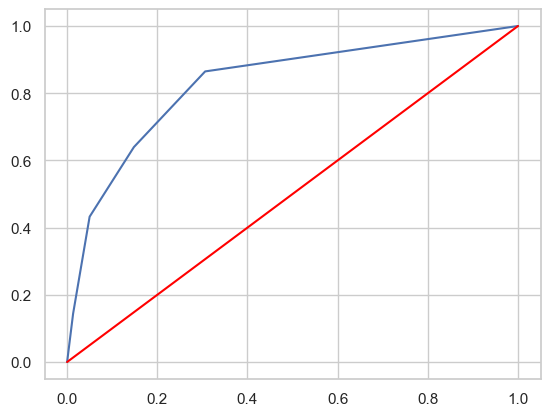

In [80]:
validation(y_test_s,pred,pred_p)

# Decision Tree Algorithm

In [81]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

model_dt=DecisionTreeClassifier(max_depth=5)

In [82]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [83]:
df['Churn'].value_counts()

0    2404
1     444
Name: Churn, dtype: int64

In [84]:
pd.crosstab(df['Age Group'],df['Churn'])

Churn,0,1
Age Group,,
1,112,0
2,764,156
3,1083,212
4,293,74
5,152,2


In [85]:
def entropy(p,q):
    if p!=0 and q!=0:
        return -(p*np.log2(p)+q*np.log2(q))
    else:
        return 0

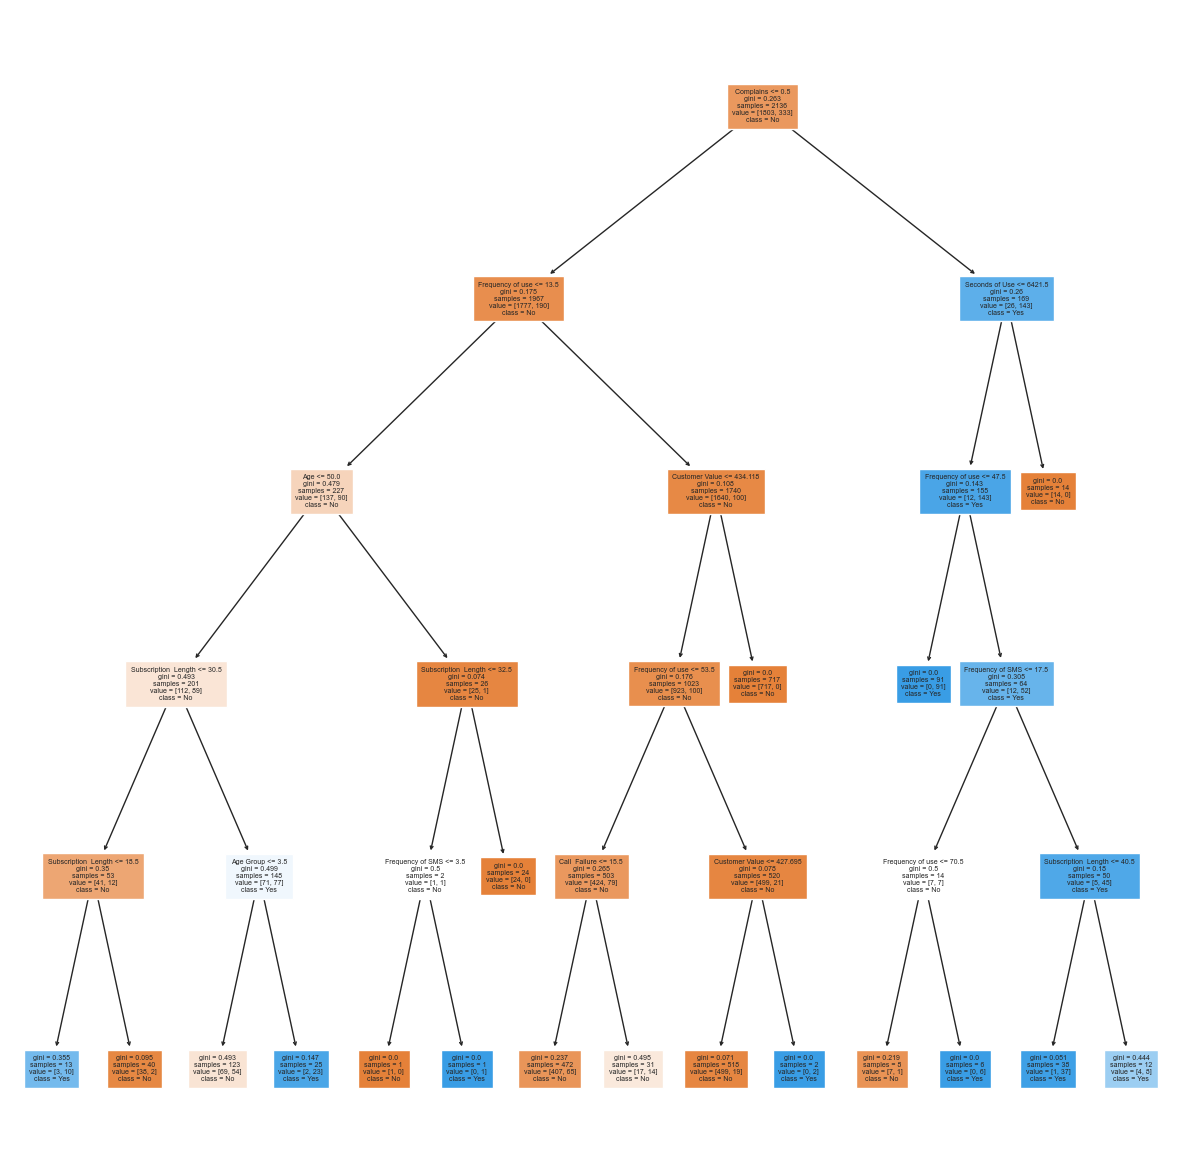

In [86]:
plt.figure(figsize=(15,15))
plot_tree(model_dt, feature_names=x_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=5)
plt.show()

In [87]:
pred_p= model_dt.predict_proba(x_test)[:,1]
pred= model_dt.predict(x_test)

[[589  12]
 [ 56  55]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       601
           1       0.82      0.50      0.62       111

    accuracy                           0.90       712
   macro avg       0.87      0.74      0.78       712
weighted avg       0.90      0.90      0.89       712

0.5671809908637429


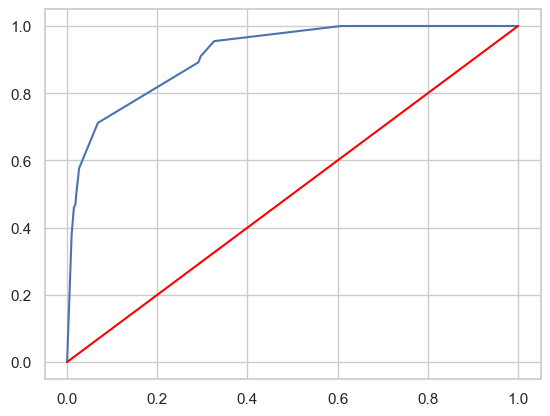

In [88]:
validation(y_test, pred, pred_p)

Note: Not done any statistical analysis, due to synthetic dataset, also columns & records were less